In [387]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()
import warnings
warnings.filterwarnings('ignore')



In [458]:
#Load the data and infer the date format for the date features

df = pd.read_csv('BikeSales-Dusty2.csv', 
                  parse_dates=['First_Seen','Last_Seen','Last_Modified'], 
                  infer_datetime_format=True)



In [459]:
df.head()

ABS Adjustable_Seat                                Bike               Body  \
0  No              No                        Kuda Pro 250  Adventure Touring   
1  No              No         250 R Road Manual 5sp 250cc        Super Sport   
2  No              No                               GN250              Naked   
3  No              No  GSX1100 ESD Road Manual 5sp 1100cc      Sport Touring   
4  No              No        TS250 Trail Manual 5sp 250cc              Trail   

     Bore                     Cam_Type        Carburettor  Carburettor(s)  \
0  62.000  SOHC (Single Over Head Cam)                NaN             1.0   
1  77.000  SOHC (Single Over Head Cam)                NaN             1.0   
2  72.000  SOHC (Single Over Head Cam)                NaN             1.0   
3  74.319  DOHC (Double Over Head Cam)  Constant velocity             4.0   
4  81.500                   Reed Valve                NaN             1.0   

                    Charging_Method  Clutch_Type   ...    Valves_Per_Cylinder  \
0  Alternator & Regulator-Rectifier  Multi plate   ...                    4.0   
1                            Engine  Multi plate   ...                    4.0   
2                            Engine          NaN   ...                    4.0   
3                            Engine          NaN   ...                    4.0   
4                            Engine          NaN   ...                    4.0   

   Warranty_KMs Warranty_in_Months_from_First_Registration  \
0            No                                          3   
1            No                                          0   
2            No                                          0   
3            No                                          0   
4            No                                          0   

  Wet_Operational_Weight  Wheel_Type Wheelbase    Width  Windscreen  \
0                  150.0       Other    1480.0  860.000    Standard   
1                  136.0     9-Spoke    1350.0  818.262    Standard   
2                  141.0         NaN    1504.0  818.500    Standard   
3                  254.0         NaN    1439.0  769.659    Standard   
4                  141.0         NaN    1400.0  818.262    Standard   

  Release_Year   Seller  
0         2009  Private  
1         2013  Private  
2         1991  Private  
3         1984  Private  
4         1976  Private  

[5 rows x 91 columns]

In [460]:
#######################################################################
### DELETE CELL WHEN MACHINE LEARNING IMPUTATION HAS BEEN COMPLETED ###
#######################################################################

# The EDA notebook will eventually perform machine learning on these features to impute the missing values.
# Just so there isn't any issues with the data for feature engineering, i'l be using the most common value.

df['Body'][df['Body'].isnull() == True] = df['Body'].mode()[0]
df['Carburettor'][df['Carburettor'].isnull() == True] = df['Carburettor'].mode()[0]
df['Clutch_Type'][df['Clutch_Type'].isnull() == True] = df['Clutch_Type'].mode()[0]
df['Country_of_Origin'][df['Country_of_Origin'].isnull() == True] = df['Country_of_Origin'].mode()[0]
df['Drive_Type'][df['Drive_Type'].isnull() == True] = df['Drive_Type'].mode()[0]
df['Frame_Material'][df['Frame_Material'].isnull() == True] = df['Frame_Material'].mode()[0]
df['Front_Brake_Description'][df['Front_Brake_Description'].isnull() == True] = df['Front_Brake_Description'].mode()[0]
df['Front_Suspension'][df['Front_Suspension'].isnull() == True] = df['Front_Suspension'].mode()[0]
df['Rear_Brake_Description'][df['Rear_Brake_Description'].isnull() == True] = df['Rear_Brake_Description'].mode()[0]
df['Rear_Suspension'][df['Rear_Suspension'].isnull() == True] = df['Rear_Suspension'].mode()[0]
df['Wheel_Type'][df['Wheel_Type'].isnull() == True] = df['Wheel_Type'].mode()[0]

df['Kilometers'][df['Kilometers'].isnull() == True] = df['Kilometers'].mean()


df['Body'][df['Body'].str.contains('MY') == True] = \
    df['Body'][df['Body'].str.contains('MY') == True].str.split().str[:-1].str.join(' ');


## Brand
This is the manufacturer of the vehicle and is the same as the Make of the bike. This is a common way to distinguish between bike at the simplest level. 


In [461]:
# Features to extract from the data
# Brand, model, Age, 
df['Brand'] = df['URL'].str.split('/').str[5].str.split('-').str[1].str.capitalize()

# Replace known names with more than one word, like Harley Davidson
df['Brand'][df['Brand'] == 'Harley'] = 'Harley Davidson'
df['Brand'][df['Brand'] == 'Mv'] = 'MV Agusta'
df['Brand'][df['Brand'] == 'Royal'] = 'Royal Enfield'
df['Brand'][df['Brand'] == 'Moto'] = 'Moto Guzzi'
df['Brand'][df['Brand'] == 'Can'] = 'Can Am'




## Model
This describes the Brand of the bike in more detail, providing a slightly more complex discription. 

In [462]:
df['Model'] = df['URL'].str.split('/').str[5].str.split('-').str[2:].str.join(' ').str.capitalize()

# Need to deal with the models that have two word, like Harley Davidson
df['Model'][df['Model'].str.contains('Davidson') == True] = \
    df['Model'][df['Model'].str.contains('Davidson') == True].str.split().str[1:].str.join(' ');
df['Model'][df['Model'].str.contains('Agusta') == True] = \
    df['Model'][df['Model'].str.contains('Agusta') == True].str.split().str[1:].str.join(' ');
df['Model'][df['Model'].str.contains('Enfield') == True] = \
    df['Model'][df['Model'].str.contains('Enfield') == True].str.split().str[1:].str.join(' ');
df['Model'][df['Model'].str.contains('Guzzi') == True] = \
    df['Model'][df['Model'].str.contains('Guzzi') == True].str.split().str[1:].str.join(' ');
df['Model'][df['Model'].str.contains('Am') == True] = \
    df['Model'][df['Model'].str.contains('Am') == True].str.split().str[1:].str.join(' ');



In [463]:
# Remove the MY YY from the end of the Model description.
# This is the effective year, the bike was registerd on the road
df['Model'][df['Model'].str.contains('my') == True] = \
    df['Model'][df['Model'].str.contains('my') == True].str.split().str[:-1].str.join(' ');
df['Model'][df['Model'].str.contains('MY') == True] = \
    df['Model'][df['Model'].str.contains('MY') == True].str.split().str[:-1].str.join(' ');


## Age
Any asset decreasing in value with age. We can deterime the age using todays date and the release year.

In [467]:
df['Age'] = datetime.now().year - df['Release_Year']

## Time to Sale
This will be the time it takes to sell the bike. We can assume the bike is sold if the last time the advertisement was seen, isn't the most recent time. ie, the advertisement has been taken down. We will assume this means the bike has been sold, even though the seller could have decided to not sell the bike.

In [468]:
days = (df['Last_Seen'] - df['First_Seen'])
df['Time_to_Sale'] = days.astype('timedelta64[D]')

# Correct for bike that have not been sold yet
df['Time_to_Sale'][(df['Last_Seen'] == df['Last_Seen'].max()) == True] = 0


In [531]:
df_numbers = df.select_dtypes(include='number')

In [532]:
sns.pairplot(df_numbers)

In [469]:
sport = df[df['Body'].str.contains('Sport') == True]
sport.shape


(5343, 95)

In [470]:
numerical_features = list(df.select_dtypes(include='number').columns)
#categorical_features = list(df.select_dtypes(exclude='number').columns)

# categorical_features = ['Bike', 'Body', 'Colour', 'Cooling', 'Country_of_Origin', 
#                         'Engine_Config', 'Fuel_Type', 'State', 'Suburb', 'Seller', 
#                         'Brand', 'Model'] # (21396, 11974)

categorical_features = ['Bike', 'Body', 'Brand', 'Model', 'Seller'] # (21396, 8785)

In [471]:
additional = pd.get_dummies(sport[categorical_features])
sport[additional.columns] = additional
sport = sport.drop(categorical_features, axis=1)


In [517]:
numerical_features = list(sport.select_dtypes(include='number').columns)
sport = sport[numerical_features]
sport.drop(['Time_to_Sale'], axis=1, inplace=True)
sport.shape # (5343, 1463)



(5343, 1462)

In [474]:
sport.describe()

Bore  Carburettor(s)  Compression_Ratio    Cylinders  \
count  5343.00000     5343.000000        5343.000000  5343.000000   
mean     77.62648        2.874041          11.211636     2.897436   
std      12.61538        1.184910           3.604493     1.054646   
min      48.00000        0.000000           1.000000     1.000000   
25%      68.00000        2.000000          10.463877     2.000000   
50%      76.00000        4.000000          11.000000     3.000000   
75%      82.00000        4.000000          12.000000     4.000000   
max     116.00000        4.000000         110.000000     4.000000   

        Dry_Weight  Engine_Description  Engine_Stroke  Engine_Voltage  \
count  5343.000000         5343.000000    5343.000000     5343.000000   
mean    201.441739          775.790941       3.998503       12.226277   
std      65.154006          322.090346       0.054707       11.384037   
min      62.000000           80.000000       2.000000       12.000000   
25%     170.000000          600.000000       4.000000       12.000000   
50%     196.000000          800.000000       4.000000       12.000000   
75%     225.000000         1000.000000       4.000000       12.000000   
max     838.600000         1400.000000       4.000000      600.000000   

       Front_Brake_Diameter  Front_Suspension_Travel       ...        \
count           5343.000000              5343.000000       ...         
mean             305.230925               140.110426       ...         
std               15.071462                37.079565       ...         
min              135.000000                43.000000       ...         
25%              296.000000               120.000000       ...         
50%              310.000000               127.000000       ...         
75%              320.000000               158.312257       ...         
max              386.000000               559.000000       ...         

       Model_spyder rss se5  Model_spyder rss sm5  \
count           5343.000000           5343.000000   
mean               0.000749              0.000187   
std                0.027354              0.013681   
min                0.000000              0.000000   
25%                0.000000              0.000000   
50%                0.000000              0.000000   
75%                0.000000              0.000000   
max                1.000000              1.000000   

       Model_spyder st limited se5  Model_spyder st sm5  \
count                  5343.000000          5343.000000   
mean                      0.000374             0.000561   
std                       0.019346             0.023691   
min                       0.000000             0.000000   
25%                       0.000000             0.000000   
50%                       0.000000             0.000000   
75%                       0.000000             0.000000   
max                       1.000000             1.000000   

       Model_turismo veloce 800 rc scs  Model_turismo veloce rc  Model_v1000  \
count                      5343.000000              5343.000000  5343.000000   
mean                          0.000187                 0.000374     0.000187   
std                           0.013681                 0.019346     0.013681   
min                           0.000000                 0.000000     0.000000   
25%                           0.000000                 0.000000     0.000000   
50%                           0.000000                 0.000000     0.000000   
75%                           0.000000                 0.000000     0.000000   
max                           1.000000                 1.000000     1.000000   

       Model_v11 sport  Seller_Dealer  Seller_Private  
count      5343.000000    5343.000000     5343.000000  
mean          0.000187       0.426352        0.573648  
std           0.013681       0.494593        0.494593  
min           0.000000       0.000000        0.000000  
25%           0.000000       0.000000        0.000000  
50%           0.0

In [ ]:
#sns.pairplot(sport[features])

In [504]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.metrics import classification_report


In [519]:

target = 'Price'
features = list(set(sport.columns) - set([target]))

sc = StandardScaler()
sc.fit(sport)
s = sc.transform(sport)
scaleSport = pd.DataFrame(s,columns=sport.columns)

X = scaleSport[features]
y = scaleSport[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [520]:

model = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=0)
model.fit(X_train, y_train)

pred = model.predict(X_test)



In [521]:
model.score(X_test,y_test)

0.4763293260077834

In [522]:
model.score(X_train,y_train)

0.47675570658888333

In [523]:
model.score(X, y)

0.4766469919776752

In [524]:
#print ('accuracy:',accuracy_score(y_test,pred))
print ('mean_squared_error:',mean_squared_error(y_test,pred))

mean_squared_error: 0.5340177094699892


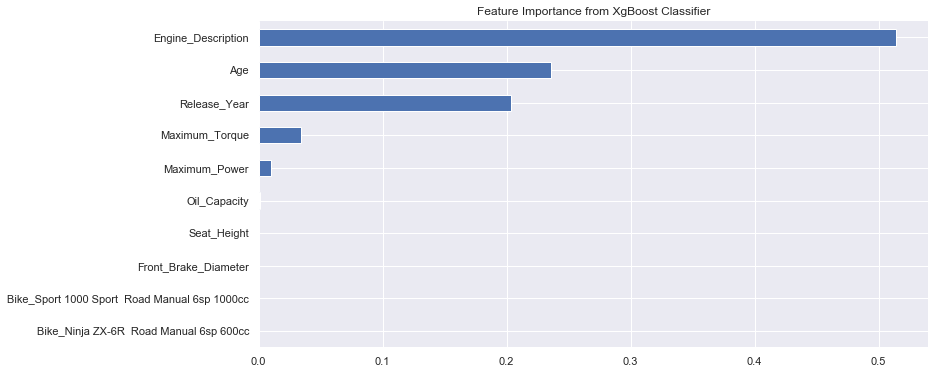

In [525]:
def feature_plot(model,X,top=10):
    
    feats_imp = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['FeatureImportance'])
    feats_imp = feats_imp.sort_values('FeatureImportance', ascending=False)[:top]

    feats_imp.plot(kind='barh', figsize=(12,6), legend=False)
    plt.title('Feature Importance from XgBoost Classifier')
    sns.despine(left=True, bottom=True)
    plt.gca().invert_yaxis()
    
feature_plot(model,X)

In [526]:
len(model.feature_importances_)

1461

In [515]:
feats_imp = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['FeatureImportance'])
feats_imp = feats_imp.sort_values('FeatureImportance', ascending=False)[:10]

feats_imp

FeatureImportance
Time_to_Sale                                            0.491892
Engine_Description                                      0.431698
Maximum_Torque                                          0.025907
Bore                                                    0.019204
Model_1299 superleggera                                 0.017414
Bike_1299 Superleggera Road Manual 6sp 1299cc           0.008997
Maximum_Power                                           0.003948
Oil_Capacity                                            0.000479
Release_Year                                            0.000232
Front_Brake_Diameter                                    0.000228